In [1]:
import numpy as np
import numba as nb

Training an Autoencoder
---

In this file I show how to build and train an autoencoder using my liblary $NeuralNet.py$ on example of load_digits dataset.    
$NeuralNet.py$ is where I implemented a code that allows to create a fully connected Neural Networkhat, that 
can be optimzed using Stochastic Gradient Descent.   

---

1. Firstly I upload the activation functions and NN class:

In [2]:
from NeuralNet import leaky_relu
from NeuralNet import sigmoid
from NeuralNet import tanh
from NeuralNet import NN

2. Then I upload and pre-process the data on which I will train my model on:

In [3]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Load digits (8x8 grayscale images)
digits = load_digits()
X = digits.data  # shape: (1797, 64)

# Normalize pixel values to [0, 1]
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split into train/test sets
X_train, X_test = train_test_split(X_scaled, test_size=0.2, random_state=42)

3. Setting the Autoencoder's architecture and training it:

In [4]:
# ========== Create the Autoencoder ==========
autoencoder = NN(input_size=64)

# -------- Encoder --------
autoencoder.add_layer(50, activation_function=tanh)
autoencoder.add_layer(40, activation_function=tanh)
autoencoder.add_layer(36, activation_function=tanh)  # Bottleneck

# -------- Decoder --------
autoencoder.add_layer(40, activation_function=tanh)
autoencoder.add_layer(50, activation_function=tanh)
autoencoder.add_layer(64, activation_function=sigmoid)  # Output layer

# ========== Training ==========
n_epochs = 500
learning_rate = 0.01

for epoch in range(n_epochs):
    losses = []
    for x in X_train:
        out = autoencoder._predict(x)
        loss = autoencoder.backward(x, lr=learning_rate)  # x == y_true
        losses.append(loss)

    avg_loss = np.mean(losses)
    print(f"Epoch {epoch+1}/{n_epochs} - Loss: {avg_loss:.5f}")


Epoch 1/500 - Loss: 4.88368
Epoch 2/500 - Loss: 3.66711
Epoch 3/500 - Loss: 3.55377
Epoch 4/500 - Loss: 3.49041
Epoch 5/500 - Loss: 3.46548
Epoch 6/500 - Loss: 3.42846
Epoch 7/500 - Loss: 3.21428
Epoch 8/500 - Loss: 3.11653
Epoch 9/500 - Loss: 3.09222
Epoch 10/500 - Loss: 3.08315
Epoch 11/500 - Loss: 2.99037
Epoch 12/500 - Loss: 2.68627
Epoch 13/500 - Loss: 2.67985
Epoch 14/500 - Loss: 2.67327
Epoch 15/500 - Loss: 2.66719
Epoch 16/500 - Loss: 2.66237
Epoch 17/500 - Loss: 2.65735
Epoch 18/500 - Loss: 2.65173
Epoch 19/500 - Loss: 2.64576
Epoch 20/500 - Loss: 2.63939
Epoch 21/500 - Loss: 2.63115
Epoch 22/500 - Loss: 2.62104
Epoch 23/500 - Loss: 2.58927
Epoch 24/500 - Loss: 2.57958
Epoch 25/500 - Loss: 2.57064
Epoch 26/500 - Loss: 2.55825
Epoch 27/500 - Loss: 2.53654
Epoch 28/500 - Loss: 2.51646
Epoch 29/500 - Loss: 2.49700
Epoch 30/500 - Loss: 2.48208
Epoch 31/500 - Loss: 2.46739
Epoch 32/500 - Loss: 2.45492
Epoch 33/500 - Loss: 2.44436
Epoch 34/500 - Loss: 2.43208
Epoch 35/500 - Loss: 2.

 Loss evaluation:
--
Loss for the test set:

In [11]:
test_losses = []
for x in X_test:
    out = autoencoder._predict(x)
    loss = autoencoder.error(x)  # compare reconstructed x to original x
    test_losses.append(loss)

avg_test_loss = np.mean(test_losses)
print("----------------------------------------")
print(f"Test Loss: {avg_test_loss:.5f}")
print("----------------------------------------")

----------------------------------------
Test Loss: 1.20813
----------------------------------------


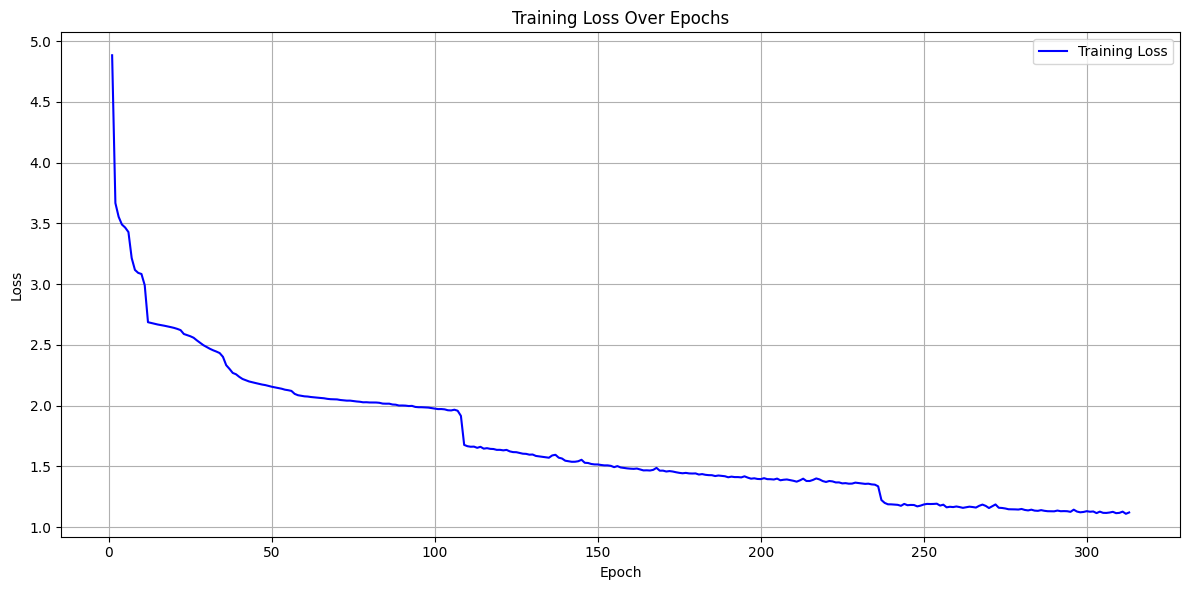

In [10]:
import matplotlib.pyplot as plt

# Paste the full list of loss values here
loss_values = [
    4.88368, 3.66711, 3.55377, 3.49041, 3.46548, 3.42846, 3.21428, 3.11653,
    3.09222, 3.08315, 2.99037, 2.68627, 2.67985, 2.67327, 2.66719, 2.66237,
    2.65735, 2.65173, 2.64576, 2.63939, 2.63115, 2.62104, 2.58927, 2.57958,
    2.57064, 2.55825, 2.53654, 2.51646, 2.49700, 2.48208, 2.46739, 2.45492,
    2.44436, 2.43208, 2.40110, 2.33226, 2.30216, 2.26882, 2.25780, 2.23647,
    2.21902, 2.20889, 2.19857, 2.19163, 2.18544, 2.17909, 2.17306, 2.16850,
    2.16149, 2.15491, 2.14934, 2.14431, 2.13873, 2.13088, 2.12649, 2.12076,
    2.09631, 2.08531, 2.08073, 2.07603, 2.07433, 2.07036, 2.06756, 2.06418,
    2.06251, 2.06011, 2.05543, 2.05257, 2.05145, 2.05069, 2.04595, 2.04348,
    2.04061, 2.04075, 2.03707, 2.03380, 2.03145, 2.02699, 2.02751, 2.02552,
    2.02521, 2.02514, 2.02282, 2.01639, 2.01542, 2.01565, 2.00886, 2.00724,
    2.00030, 2.00073, 1.99957, 1.99618, 1.99737, 1.98884, 1.98658, 1.98627,
    1.98461, 1.98341, 1.97914, 1.97472, 1.97090, 1.97138, 1.96885, 1.96145,
    1.95997, 1.96595, 1.95749, 1.91512, 1.67617, 1.66555, 1.66110, 1.66213,
    1.65220, 1.66051, 1.64542, 1.64932, 1.64373, 1.64228, 1.63543, 1.63564,
    1.63137, 1.63512, 1.62282, 1.61696, 1.61622, 1.61012, 1.60388, 1.60248,
    1.59589, 1.59712, 1.58542, 1.58200, 1.57843, 1.57443, 1.57073, 1.58944,
    1.59489, 1.57117, 1.56438, 1.54625, 1.54218, 1.53732, 1.53759, 1.54188,
    1.55376, 1.52904, 1.52743, 1.51913, 1.51562, 1.51529, 1.51098, 1.50765,
    1.50773, 1.50385, 1.49317, 1.50163, 1.49057, 1.48666, 1.48299, 1.48050,
    1.47907, 1.48158, 1.47395, 1.46633, 1.46708, 1.46545, 1.47080, 1.48718,
    1.46412, 1.46443, 1.45727, 1.46081, 1.45707, 1.45112, 1.44616, 1.44273,
    1.44585, 1.44158, 1.44066, 1.44150, 1.43219, 1.43598, 1.43020, 1.42732,
    1.42676, 1.41993, 1.42434, 1.42091, 1.41823, 1.40982, 1.41506, 1.41128,
    1.41134, 1.40878, 1.41767, 1.40691, 1.39819, 1.40137, 1.39591, 1.39468,
    1.40237, 1.39431, 1.39381, 1.39146, 1.39883, 1.38510, 1.38946, 1.39165,
    1.38611, 1.38091, 1.37377, 1.38423, 1.39820, 1.37921, 1.37897, 1.38790,
    1.40017, 1.39229, 1.37861, 1.37126, 1.37902, 1.37584, 1.36729, 1.36762,
    1.35952, 1.36143, 1.35698, 1.35775, 1.36569, 1.36221, 1.35930, 1.35538,
    1.35699, 1.35123, 1.34894, 1.33519, 1.22244, 1.19883, 1.18731, 1.18685,
    1.18491, 1.18291, 1.17486, 1.19065, 1.17977, 1.18209, 1.18133, 1.17018,
    1.17634, 1.18576, 1.19065, 1.18955, 1.19032, 1.19226, 1.17681, 1.18410,
    1.16235, 1.16695, 1.16448, 1.16939, 1.16438, 1.15814, 1.16329, 1.16781,
    1.16474, 1.16055, 1.17494, 1.18488, 1.17413, 1.15649, 1.17125, 1.18607,
    1.15895, 1.15705, 1.15295, 1.14656, 1.14640, 1.14543, 1.14409, 1.14891,
    1.14081, 1.13700, 1.14305, 1.13530, 1.13348, 1.13927, 1.13375, 1.13041,
    1.13042, 1.12953, 1.13570, 1.13039, 1.13132, 1.13040, 1.12520, 1.14313,
    1.12755, 1.12136, 1.12428, 1.13059, 1.12610, 1.12824, 1.11474, 1.12703,
    1.11710, 1.11627, 1.11965, 1.12532, 1.11435, 1.11682, 1.12701, 1.10915,
    1.12020
]

# Create x-axis values representing epoch numbers
epochs = list(range(1, len(loss_values) + 1))

# Plot the loss curve
plt.figure(figsize=(12, 6))
plt.plot(epochs, loss_values, label='Training Loss', color='blue')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


Here I show, how the model deals with example digid from the test set (it has not seen this image during training).

Firstly, I show orginal image, then the compressed version (bottleneck) 
and at the end the reconstructed image:

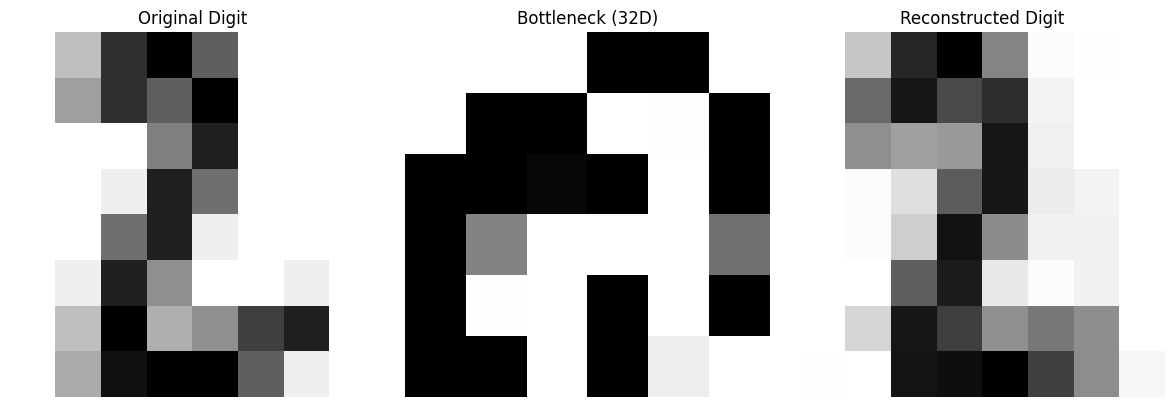

In [14]:
import matplotlib.pyplot as plt

# Select a sample from the test set
sample_idx = 4
x_sample = X_test[sample_idx]

# === Get original image ===
original_image = x_sample.reshape(8, 8)

# === Run through the autoencoder ===
_ = autoencoder._predict(x_sample)  # Forward pass
encoded = autoencoder.activations[3]  # Bottleneck output (32D)
reconstructed = autoencoder.activations[-1].reshape(8, 8)

# === Plotting ===
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

# Original
axs[0].imshow(original_image, cmap='binary')  # black digit, white background
axs[0].set_title("Original Digit")
axs[0].axis('off')

# Bottleneck
axs[1].imshow(encoded.reshape(6, 6), cmap='binary')  # reshape to visualize
axs[1].set_title("Bottleneck (32D)")
axs[1].axis('off')

# Reconstructed
axs[2].imshow(reconstructed, cmap='binary')
axs[2].set_title("Reconstructed Digit")
axs[2].axis('off')

plt.tight_layout()
plt.show()


Save the weights of the Autoencoder for later use:

In [15]:

# Get weights from each layer (list of lists of arrays)
layer_weights = [layer.get_weights() for layer in autoencoder.layers]

# Convert to numpy object array (this avoids the ValueError)
layer_weights_obj = np.array(layer_weights, dtype=object)

# Now save with pickle allowed
np.save('layer_weights.npy', layer_weights_obj, allow_pickle=True)
